In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
import fastai
from fastai import * 
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *

import pandas as pd
import numpy as np

fastai.version.__version__

'1.0.36.post1'

In [3]:
input_path ='../input'
!ls -al {input_path}

total 2288
drwxr-xr-x 4 root root   4096 Dec 12 03:20 .
drwxr-xr-x 6 root root   4096 Dec 21 19:33 ..
-rw-r--r-- 1 root root 509449 Dec 12 03:16 sample_submission.csv
drwxr-xr-x 2 root root 270336 Dec 12 03:20 test
drwxr-xr-x 2 root root 933888 Dec 12 03:27 train
-rw-r--r-- 1 root root 608673 Dec 12 03:20 train.csv


In [4]:
work_dir = '/kaggle/working'
!ls {work_dir}

__notebook_source__.ipynb


In [5]:
# make sure CUDA is available and enabled
print('CUDA enabled:',torch.cuda.is_available()) 
print('CUDNN enabled:', torch.backends.cudnn.enabled)

CUDA enabled: True
CUDNN enabled: True


# Dataset preprocessing

In [6]:
train_dir = f"{input_path}/train"
train_labels = f"{input_path}/train.csv"
test_dir = f"{input_path}/test"

## Train model

In [17]:
SZ = 224
BS = 128
NUM_WORKERS = 0
SEED=0
arch = models.resnet18

In [8]:
data = (
    ImageDataBunch
        .from_csv(path=train_dir, csv_labels='../train.csv', ds_tfms=get_transforms(), size=SZ,num_workers=NUM_WORKERS)
#         .databunch(bs=BS, num_workers=NUM_WORKERS, path='../input')
#         .transform(get_transforms(do_flip=False), size=SZ, resize_method=ResizeMethod.SQUISH)
#         .normalize(imagenet_stats)
)

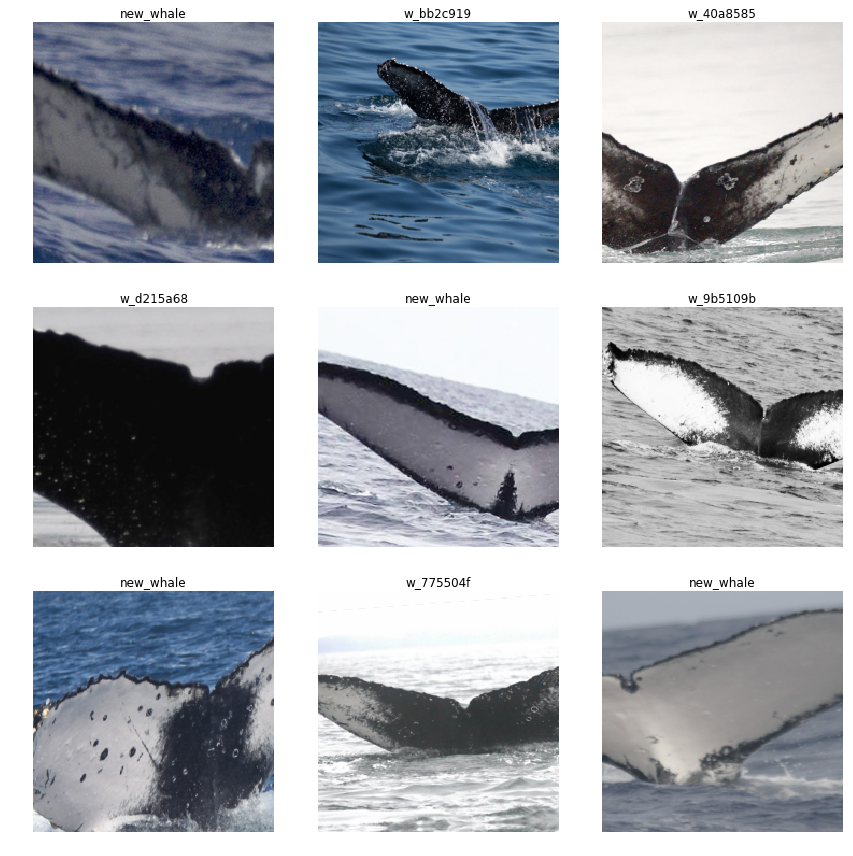

In [9]:
data.show_batch(rows=3, fig_size=(SZ, SZ))

In [18]:
learn = create_cnn(data, arch, metrics=[accuracy, error_rate], model_dir=f"{work_dir}/model")

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /tmp/.torch/models/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:05<00:00, 8971014.58it/s] 


In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


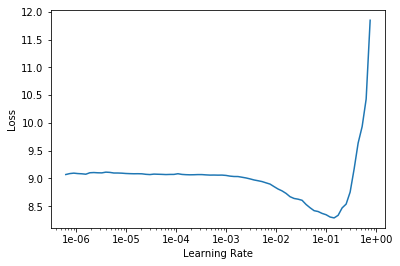

In [20]:
learn.recorder.plot()

# Precompute

In [21]:
learn = create_cnn(data, arch, metrics=[accuracy, error_rate], model_dir=f"{work_dir}/model")

In [ ]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate


In [ ]:
learn.save('model_pre_5_1e-2')

# Submission - for now random submission

In [ ]:
train_set = pd.read_csv(f"{input_path}/train.csv")
train_set.head()

In [ ]:
unique_labels = train_set['Id'].unique()
unique_labels.shape

In [ ]:
submission = pd.read_csv(f"{input_path}/sample_submission.csv")
submission.head()

In [ ]:
print(' '.join(np.append(np.random.choice(unique_labels, 4), 'new_whale')))


In [ ]:
submission['Id'] = submission['Id'].apply(lambda x : ' '.join(np.append(np.random.choice(unique_labels, 4), 'new_whale')))

In [ ]:
print(submission.head())
print(submission.shape)

In [ ]:
submission.to_csv('submission.csv', index=False)